In [1]:
from pprint import pprint

import pandas as pd
import numpy as np
import optuna 

from sklearn.metrics import mean_squared_error
import lightgbm as lgbm

from scripts.preprocess import preprocess
from sklearn.model_selection import train_test_split
from scripts.model import fold_fit_score

import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
X, y, X_test = preprocess(
    "data/Housing_dataset_train.csv",
    "data/Housing_dataset_test.csv",
    "state_to_region.json",
)

print(X.shape, y.shape, X_test.shape)

(14000, 7) (14000,) (6000, 7)


In [3]:
X.dtypes

loc               float64
bedroom           float64
bathroom          float64
parking_space     float64
region            float64
bed_bath_ratio    float64
title_rank        float64
dtype: object

In [4]:
# split into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=7)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(10500, 7) (3500, 7)
(10500,) (3500,)


In [5]:
def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": 1000,
        "verbosity": -1,
        "bagging_freq": 1,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = lgbm.LGBMRegressor(**params)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        callbacks=[lgbm.callback.early_stopping(stopping_rounds=100)],
        verbose=False,
    )

    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)

    return rmse


study_name = "lgbm-house-prediction"
storage_name = f"sqlite:///{study_name}.db"
study = optuna.create_study(
    direction="minimize", storage=storage_name, study_name="lgbm-sqlite-dashboard"
)
study.optimize(objective, n_trials=20)

[I 2023-08-15 14:43:50,853] A new study created in RDB with name: lgbm-sqlite-dashboard


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-15 14:44:08,265] Trial 0 finished with value: 572343.1252353289 and parameters: {'learning_rate': 0.013387383719886304, 'num_leaves': 243, 'subsample': 0.26612699936732404, 'colsample_bytree': 0.15338495515232314, 'min_data_in_leaf': 40}. Best is trial 0 with value: 572343.1252353289.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 572343
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 571805


[I 2023-08-15 14:44:26,085] Trial 1 finished with value: 571804.6959091442 and parameters: {'learning_rate': 0.013890798707066016, 'num_leaves': 562, 'subsample': 0.7788247981201644, 'colsample_bytree': 0.10798465341535805, 'min_data_in_leaf': 40}. Best is trial 1 with value: 571804.6959091442.


[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-15 14:45:27,776] Trial 2 finished with value: 542737.2189351728 and parameters: {'learning_rate': 0.024718562293985172, 'num_leaves': 163, 'subsample': 0.7191905833011688, 'colsample_bytree': 0.8989963124519793, 'min_data_in_leaf': 17}. Best is trial 2 with value: 542737.2189351728.


Early stopping, best iteration is:
[175]	valid_0's rmse: 542737
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 692359


[I 2023-08-15 14:47:09,466] Trial 3 finished with value: 692358.9603868603 and parameters: {'learning_rate': 0.00117292443808028, 'num_leaves': 992, 'subsample': 0.6901621009404127, 'colsample_bytree': 0.6720413894291358, 'min_data_in_leaf': 41}. Best is trial 2 with value: 542737.2189351728.


[LightGBM] [Warning] min_data_in_leaf is set=94, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=94
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-15 14:47:31,594] Trial 4 finished with value: 620122.1031986857 and parameters: {'learning_rate': 0.006272028156910085, 'num_leaves': 673, 'subsample': 0.1146567754935825, 'colsample_bytree': 0.573817471546058, 'min_data_in_leaf': 94}. Best is trial 2 with value: 542737.2189351728.


Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 620122
[LightGBM] [Warning] min_data_in_leaf is set=81, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=81
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 630512


[I 2023-08-15 14:47:49,540] Trial 5 finished with value: 630511.940028516 and parameters: {'learning_rate': 0.006748976925894898, 'num_leaves': 350, 'subsample': 0.4013636859419865, 'colsample_bytree': 0.19257485620852327, 'min_data_in_leaf': 81}. Best is trial 2 with value: 542737.2189351728.


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-15 14:48:35,635] Trial 6 finished with value: 537417.0224901205 and parameters: {'learning_rate': 0.06557303678578777, 'num_leaves': 775, 'subsample': 0.8091970028656846, 'colsample_bytree': 0.5425179328988707, 'min_data_in_leaf': 60}. Best is trial 6 with value: 537417.0224901205.


Early stopping, best iteration is:
[170]	valid_0's rmse: 537417
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 536735


[I 2023-08-15 14:48:57,008] Trial 7 finished with value: 536735.2366714696 and parameters: {'learning_rate': 0.013124704613603213, 'num_leaves': 435, 'subsample': 0.7195235930663942, 'colsample_bytree': 0.43329298992824355, 'min_data_in_leaf': 93}. Best is trial 7 with value: 536735.2366714696.


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 545667


[I 2023-08-15 14:50:53,339] Trial 8 finished with value: 545666.591596468 and parameters: {'learning_rate': 0.005670641889779678, 'num_leaves': 466, 'subsample': 0.27145626210390267, 'colsample_bytree': 0.37115247281373426, 'min_data_in_leaf': 6}. Best is trial 7 with value: 536735.2366714696.


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 554452


[I 2023-08-15 14:51:17,880] Trial 9 finished with value: 554452.4321069141 and parameters: {'learning_rate': 0.01405122537465944, 'num_leaves': 475, 'subsample': 0.5952119605371743, 'colsample_bytree': 0.2411932454205436, 'min_data_in_leaf': 80}. Best is trial 7 with value: 536735.2366714696.


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-15 14:51:29,879] Trial 10 finished with value: 531513.8746313928 and parameters: {'learning_rate': 0.09117564942203059, 'num_leaves': 9, 'subsample': 0.924889019539922, 'colsample_bytree': 0.3849301274714246, 'min_data_in_leaf': 100}. Best is trial 10 with value: 531513.8746313928.


Early stopping, best iteration is:
[513]	valid_0's rmse: 531514
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-15 14:51:35,907] Trial 11 finished with value: 551192.7232577201 and parameters: {'learning_rate': 0.0745724046150723, 'num_leaves': 17, 'subsample': 0.9550121495969813, 'colsample_bytree': 0.3470292172975061, 'min_data_in_leaf': 100}. Best is trial 10 with value: 531513.8746313928.


Early stopping, best iteration is:
[506]	valid_0's rmse: 551193
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-15 14:51:46,317] Trial 12 finished with value: 531924.9501306467 and parameters: {'learning_rate': 0.038881966523088056, 'num_leaves': 12, 'subsample': 0.980637239884532, 'colsample_bytree': 0.38794772449916015, 'min_data_in_leaf': 71}. Best is trial 10 with value: 531513.8746313928.


Did not meet early stopping. Best iteration is:
[985]	valid_0's rmse: 531925
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-15 14:52:04,984] Trial 13 finished with value: 550503.4471418414 and parameters: {'learning_rate': 0.08534644904438332, 'num_leaves': 7, 'subsample': 0.9937022070738485, 'colsample_bytree': 0.3098533076843088, 'min_data_in_leaf': 65}. Best is trial 10 with value: 531513.8746313928.


Did not meet early stopping. Best iteration is:
[987]	valid_0's rmse: 550503
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[488]	valid_0's rmse: 535085


[I 2023-08-15 14:52:28,554] Trial 14 finished with value: 535085.2955428981 and parameters: {'learning_rate': 0.03671228710272042, 'num_leaves': 136, 'subsample': 0.896466659750563, 'colsample_bytree': 0.45068536169470974, 'min_data_in_leaf': 75}. Best is trial 10 with value: 531513.8746313928.


[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[975]	valid_0's rmse: 558492


[I 2023-08-15 14:52:53,918] Trial 15 finished with value: 558491.5700782485 and parameters: {'learning_rate': 0.09793256252755382, 'num_leaves': 265, 'subsample': 0.8889438897982678, 'colsample_bytree': 0.08104457913553165, 'min_data_in_leaf': 58}. Best is trial 10 with value: 531513.8746313928.


[LightGBM] [Warning] min_data_in_leaf is set=72, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=72
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-15 14:53:15,666] Trial 16 finished with value: 553141.286657038 and parameters: {'learning_rate': 0.04518949614836112, 'num_leaves': 108, 'subsample': 0.990312979497071, 'colsample_bytree': 0.2567114581701935, 'min_data_in_leaf': 72}. Best is trial 10 with value: 531513.8746313928.


Early stopping, best iteration is:
[583]	valid_0's rmse: 553141
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[357]	valid_0's rmse: 535877


[I 2023-08-15 14:53:31,461] Trial 17 finished with value: 535877.2606192263 and parameters: {'learning_rate': 0.04335459910132294, 'num_leaves': 281, 'subsample': 0.8532606528345678, 'colsample_bytree': 0.6491206777858041, 'min_data_in_leaf': 87}. Best is trial 10 with value: 531513.8746313928.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds


[I 2023-08-15 14:53:49,627] Trial 18 finished with value: 536970.4678755624 and parameters: {'learning_rate': 0.02718388375414969, 'num_leaves': 96, 'subsample': 0.8821698257240136, 'colsample_bytree': 0.42797207318542463, 'min_data_in_leaf': 20}. Best is trial 10 with value: 531513.8746313928.


Early stopping, best iteration is:
[328]	valid_0's rmse: 536970
[LightGBM] [Warning] min_data_in_leaf is set=51, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=51
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[364]	valid_0's rmse: 552131


[I 2023-08-15 14:54:10,581] Trial 19 finished with value: 552131.3085654643 and parameters: {'learning_rate': 0.06642577904240611, 'num_leaves': 988, 'subsample': 0.6056564053950444, 'colsample_bytree': 0.27909993704755515, 'min_data_in_leaf': 51}. Best is trial 10 with value: 531513.8746313928.


In [6]:
pprint(f'Best hyperparameters: {study.best_params}')
print('\n')
pprint(f'Best RMSE: {study.best_value}')

("Best hyperparameters: {'learning_rate': 0.09117564942203059, 'num_leaves': "
 "9, 'subsample': 0.924889019539922, 'colsample_bytree': 0.3849301274714246, "
 "'min_data_in_leaf': 100}")


'Best RMSE: 531513.8746313928'


In [7]:
other_params = {
    "objective": "regression",
    "metric": "rmse",
    "n_estimators": 1000,
    "verbosity": -1,
    "bagging_freq": 1,
}

lgb_model = lgbm.LGBMRegressor(**study.best_params, **other_params, random_state=42)

In [8]:
# lgb_model = lgbm.LGBMRegressor(
#     objective="regression",
#     metric="rmse",
#     n_estimators=1000,
#     verbosity=-1,
#     bagging_freq=1,
#     learning_rate=0.019978591523029308,
#     num_leaves=613,
#     subsample=0.8391699325392805,
#     colsample_bytree=0.47702158866088945,
#     min_data_in_leaf=99,
# )

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


Fold 1 RMSE: 471,812
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
Fold 2 RMSE: 409,749
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
Fold 3 RMSE: 584,274
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
Fold 4 RMSE: 466,844
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_

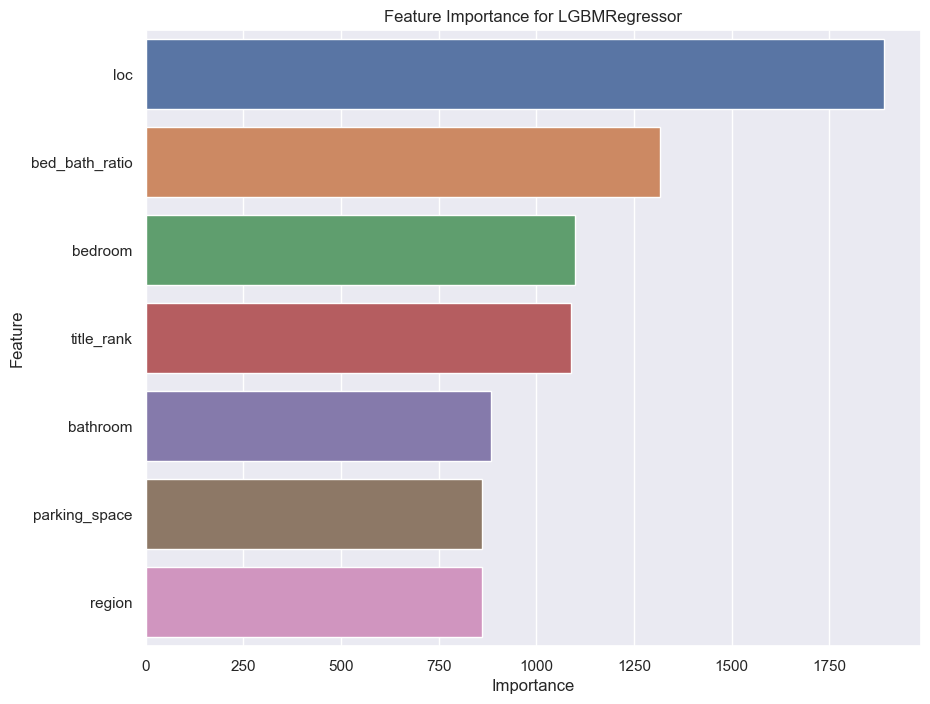

In [9]:
lgbm_preds = fold_fit_score(
    lgb_model,
    X,
    y,
    X_test,
    15,
    transform_func=np.log1p,
    inverse_transform_func=np.expm1,
    plot_feat_imp=True,
)

In [10]:
sample_sub = pd.read_csv('data/Sample_submission.csv')
print(sample_sub.shape)

sample_sub["price"] = np.mean(lgbm_preds, axis=0)
sample_sub.to_csv(
    "submissions/lgbm_regressor_tuned_kfold_15_log_transformed_feat_eng_optuna.csv", index=False
)
sample_sub.head()

(6000, 1)


,ID,price
0,845,2.354066e+06
1,1924,1.033344e+06
2,10718,1.185431e+06
3,12076,9.472772e+06
4,12254,1.833892e+06
